# MSE (Mean Square Error)
Error Cuadrático Medio

### Cual es la cantididad optima de bins suponiendo distribución Gaussiana?

Cantidad de bins en un histograma:
https://link.springer.com/article/10.1007%2FBF01025868

In [1]:
import numpy as np
from probability_helper import plot_normalized_histogram_sorted
from matplotlib import pyplot as plt
from scipy.stats import norm

## Dados los datos del ejercicio anterior:

### Lo cargamos

In [2]:
gran_danes_pesos = np.load('data/gran_danes_pesos.npy')

### Graficamos

In [3]:
# Esta función grafica histograma como densidad
def plot_get_densidad(data, dens = 1):
    data_rounded = np.round(data*dens)/dens
    espacio_muestral, probs_ = plot_normalized_histogram_sorted(data_rounded)
    probs_ = probs_*dens
    return espacio_muestral, probs_

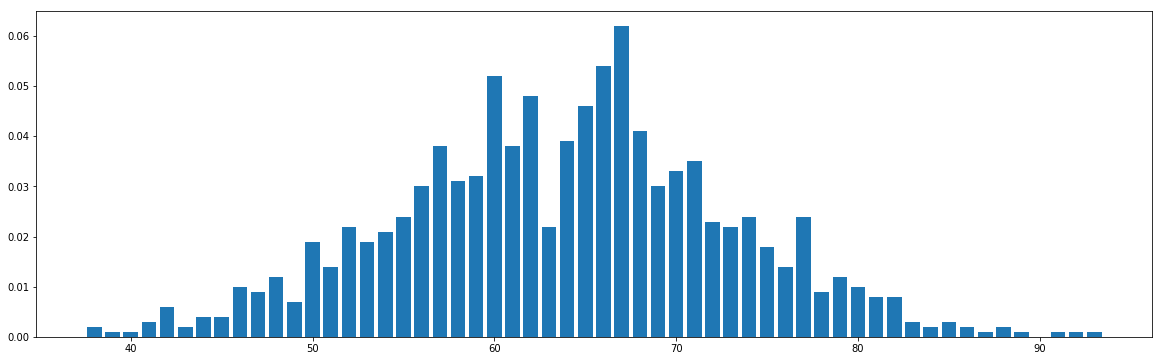

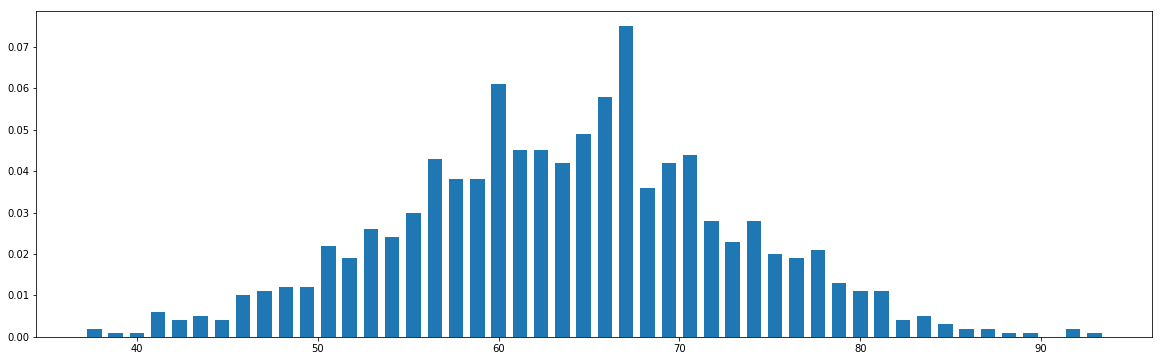

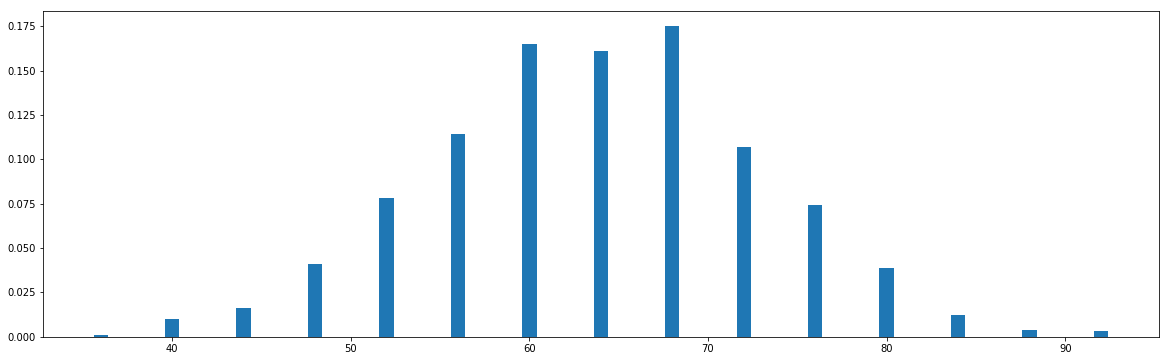

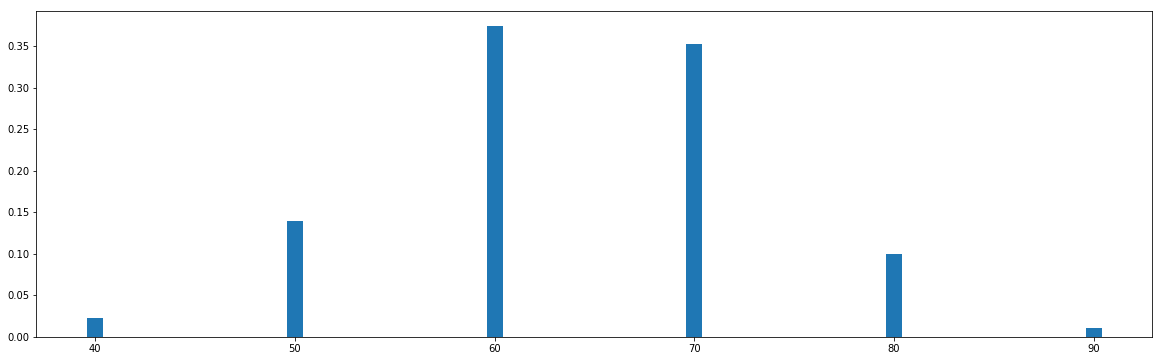

In [4]:
espacio_muestral_1, probs_gran_danes_pesos_1 = plot_get_densidad(gran_danes_pesos, dens=1)
espacio_muestral_2, probs_gran_danes_pesos_2 = plot_get_densidad(gran_danes_pesos, dens=0.85)
espacio_muestral_3, probs_gran_danes_pesos_3 = plot_get_densidad(gran_danes_pesos, dens=0.25)
espacio_muestral_4, probs_gran_danes_pesos_4 = plot_get_densidad(gran_danes_pesos, dens=0.1)

In [5]:
media_MLE = gran_danes_pesos.mean()
std_MLE = gran_danes_pesos.std()

In [6]:
def get_cont_hist(sample_space, probs, N=200):
    lin_space = np.linspace(sample_space[0]-0.5,sample_space[-1]-0.5,N)
    probs_cont = np.zeros(N)
    step = N/len(sample_space)
    for i, p in enumerate(probs_cont):
        probs_cont[i] = probs[int(i // step)]
    return lin_space, probs_cont
em_cont_1, probs_cont_1 = get_cont_hist(espacio_muestral_1, probs_gran_danes_pesos_1)
em_cont_2, probs_cont_2 = get_cont_hist(espacio_muestral_2, probs_gran_danes_pesos_2)
em_cont_3, probs_cont_3 = get_cont_hist(espacio_muestral_3, probs_gran_danes_pesos_3)
em_cont_4, probs_cont_4 = get_cont_hist(espacio_muestral_4, probs_gran_danes_pesos_4)

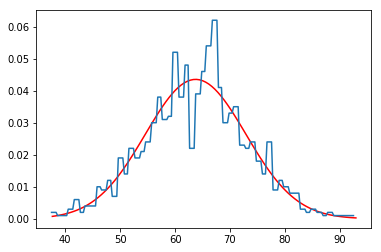

In [7]:
rango_pesos = np.linspace(espacio_muestral_2[0], espacio_muestral_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos, media_MLE, std_MLE)
plt.plot(rango_pesos, pdf_pesos, color='r')
#plt.bar(espacio_muestral_1, probs_gran_danes_pesos_1, color='y')
plt.plot(em_cont_1, probs_cont_1)

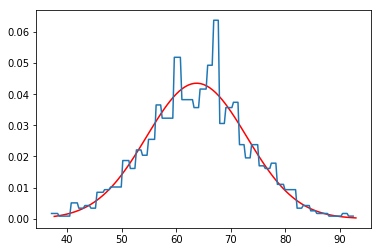

In [8]:
plt.plot(rango_pesos, pdf_pesos, color='r')
#plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color='y')
plt.plot(em_cont_2, probs_cont_2)

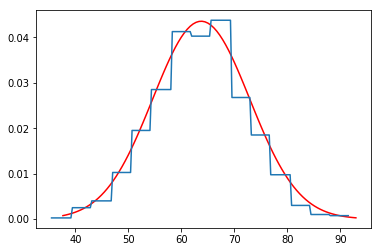

In [83]:
plt.plot(rango_pesos, pdf_pesos, color='r')
#plt.bar(espacio_muestral_3, probs_gran_danes_pesos_3, color='y')
plt.plot(em_cont_3, probs_cont_3)

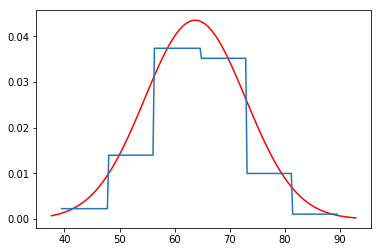

In [84]:
plt.plot(rango_pesos, pdf_pesos, color='r')
#plt.bar(espacio_muestral_4, probs_gran_danes_pesos_4, color='y')
plt.plot(em_cont_4, probs_cont_4)

Dados:

$p(x=x_i)$ la función de densidad de probabilidad (La Roja)

$\hat{p}(x=x_i)$ El histograma continuo como densidad (La amarilla)

$[p(x=x_i) - \hat{p}(x=x_i)]^2$ Error cuadrático de un punto

Promedio de error cuadrático de toda la curva:
\begin{equation}
\large
\frac{1}{N}\sum_{i=1}^N{[p(x=x_i) - \hat{p}(x=x_i)]^2}
\end{equation}

\begin{equation}
\large
\frac{1}{N}\sum_{i=1}^N{[N(\mu, \sigma) - \hat{p}(x=x_i)]^2}
\end{equation}

In [73]:
def MSE(params, espacio_muestral, probs):
    # paramas -> [mean, std]
    pdf = norm.pdf(espacio_muestral, params[0], params[1])
    return ((pdf - probs)**2).mean()

In [80]:
print(MSE((media_MLE, std_MLE), em_cont_1, probs_cont_1))
print(MSE((media_MLE, std_MLE), em_cont_2, probs_cont_2))
print(MSE((media_MLE, std_MLE), em_cont_3, probs_cont_3))
print(MSE((media_MLE, std_MLE), em_cont_4, probs_cont_4))

3.386913109924069e-05
2.4485335674271006e-05
8.590993096929914e-06
3.2798781906521904e-05


In [27]:
espacio_muestral_1.shape, probs_gran_danes_pesos_1.shape

((29,), (55,))

### La Media y la Varianza de los datos minimizan el MSE entre el histograma y la Gaussiana?

In [11]:
media_MLE = gran_danes_pesos.mean()
std_MLE = gran_danes_pesos.std()

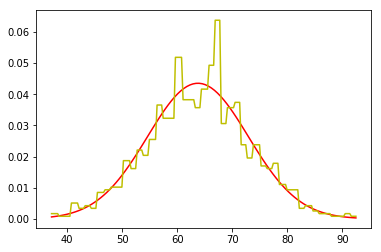

In [88]:
rango_pesos = np.linspace(em_cont_2[0], em_cont_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos, media_MLE, std_MLE)
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.plot(em_cont_2, probs_cont_2, color='y')
plt.show()

In [89]:
media_MLE, std_MLE

(63.744769999999995, 9.164246283634023)

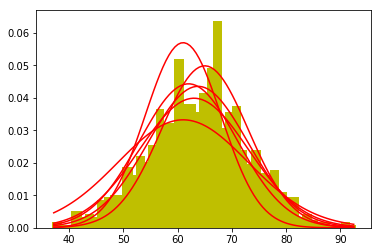

In [93]:
posibles_params = [(62, 9), (63, 10), (65, 8), (61, 12), (61, 7), (63.75, 9.16)]
for media_, std_ in posibles_params:
    pdf_pesos_ = norm.pdf(rango_pesos, media_, std_)
    plt.plot(rango_pesos, pdf_pesos_, color='r')
plt.bar(em_cont_2, probs_cont_2, color='y')
plt.show()

**La respuesta formal**: Se puede demostrar que esas formas de calcular la media y el desvio maximizan likelihood (verosimilitud) si supongo que todas las mediciones de pesos partieron de una distribución normal con la media y el desvio calculados

Esto quedará para más adelante ya que primero tenemos que definir que es el likelihood (verosimilitud)

## MMSE

\begin{equation}
\large
argmin_{\mu, \sigma}\{\frac{1}{N}\sum_{i=1}^N{[N(\mu, \sigma) - \hat{p}(x=x_i)]^2}\}
\end{equation}

In [100]:
from scipy.optimize import minimize
res = minimize(lambda x: MSE(x, em_cont_2, probs_cont_2), [60, 3])
print(res)
media_MSE = res.x[0]
std_MSE = res.x[1]

      fun: 2.9113643641042303e-05
 hess_inv: array([[196823.34327927, -59459.11116055],
       [-59459.11116055,  65886.87559239]])
      jac: array([3.72464774e-06, 7.39649863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 140
      nit: 30
     njev: 35
   status: 0
  success: True
        x: array([64.66795978,  9.97495134])


In [98]:
print(media_MLE, std_MLE)
print(media_MSE, std_MSE)

63.744769999999995 9.164246283634023
64.66795977724456 9.974951339956837


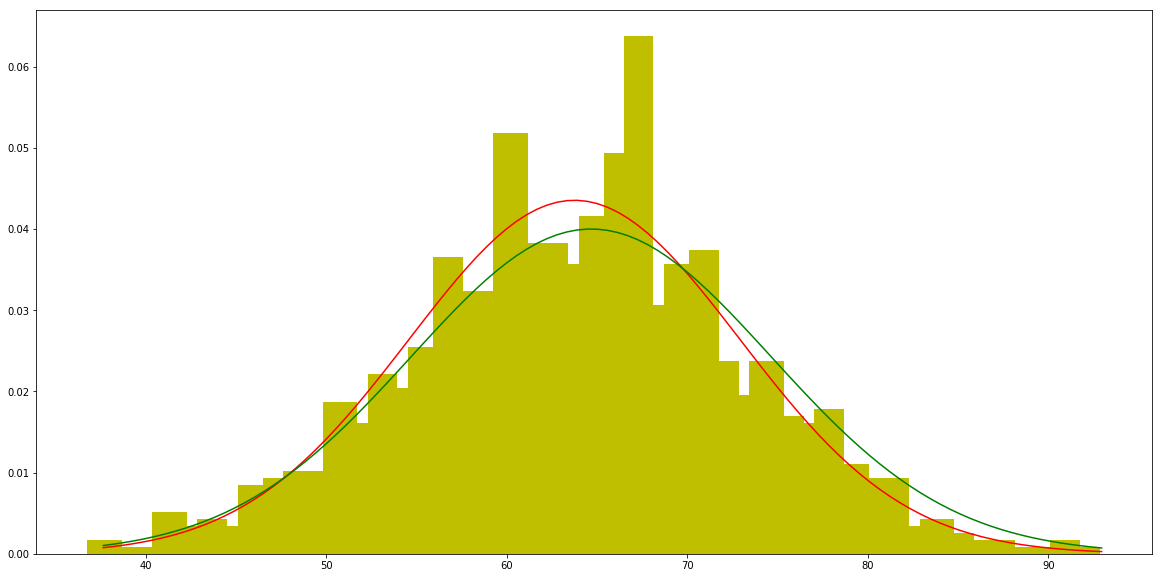

In [99]:
plt.figure(figsize=(20,10))
rango_pesos_ = np.linspace(espacio_muestral_2[0], espacio_muestral_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos_, media_MLE, std_MLE)
pdf_pesos_ = norm.pdf(rango_pesos_, media_MSE, std_MSE)
plt.plot(rango_pesos_, pdf_pesos, color='r')
plt.plot(rango_pesos_, pdf_pesos_, color='g')
plt.bar(em_cont_2, probs_cont_2, color='y')
plt.show()